<a href="https://colab.research.google.com/github/Saravananshankar98/Colab-ML/blob/main/Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
data = pd.read_csv('weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [11]:
categorical_cols = data.select_dtypes(include=['object'])
categorical_cols

,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy
...,...,...,...,...
13195,overcast,Summer,mountain,Rainy
13196,cloudy,Winter,coastal,Snowy
13197,overcast,Autumn,coastal,Cloudy
13198,overcast,Winter,inland,Snowy


In [12]:
numerical_cols = data.select_dtypes(include=['float64', 'int64'])
numerical_cols

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5
...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0
13198,3.0,76,10.0,94.0,984.27,0,2.0


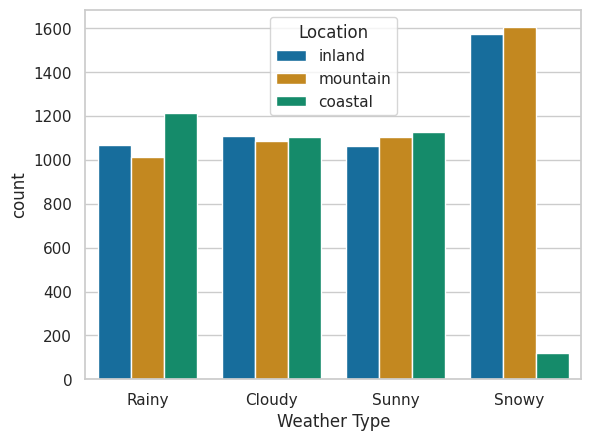

In [13]:
sns.set(style = "whitegrid")
sns.countplot(x = "Weather Type", hue = "Location", data = data, palette="colorblind");

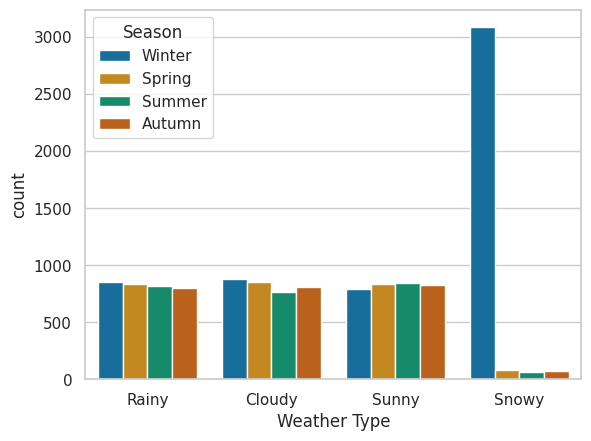

In [14]:
sns.countplot(x = "Weather Type", hue = "Season", data = data, palette="colorblind");

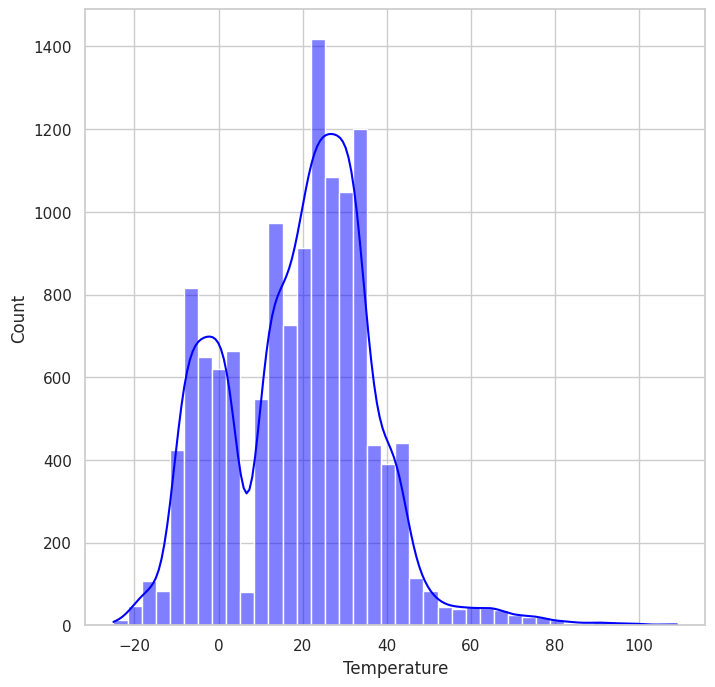

In [15]:
plt.figure(figsize = (8,8))
sns.histplot(x = 'Temperature',bins = 40, kde = True, data= data, color = "#0000FF");

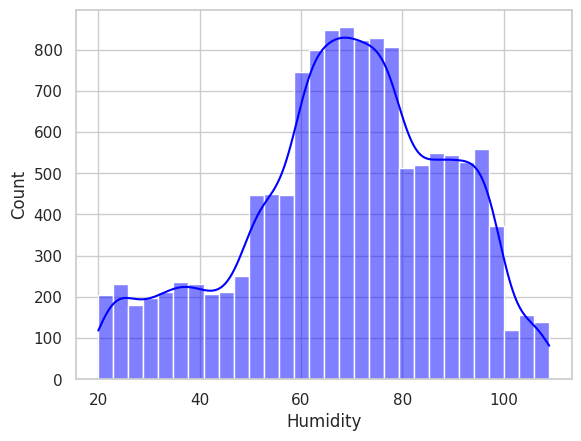

In [16]:
sns.histplot(x = 'Humidity', bins = 30 ,kde = True, data= data, color = "#0000FF");

In [17]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [18]:
columns = ["Cloud Cover","Season","Location"]
df = one_hot_encoder(data, columns)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,False,False,True,False,False,True,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,False,False,True,True,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,False,False,False,True,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,False,False,False,True,False,False,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,False,True,False,False,False,True,False,True


In [19]:
X = df.drop("Weather Type", axis = 1)
Y  = df["Weather Type"]
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,False,False,True,False,False,True,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,False,False,True,True,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,False,False,False,True,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,False,False,False,True,False,False,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,False,True,False,False,False,True,False,True


In [20]:
Y.head()

0     Rainy
1    Cloudy
2     Sunny
3     Sunny
4     Rainy
Name: Weather Type, dtype: object

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=22)

In [22]:
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled = scaler.fit_transform(x_train)

In [23]:
x_test_scaled = x_test.copy()
x_test_scaled = scaler.transform(x_test)

In [24]:
x_train_scaled

array([[-0.87023812, -0.18063993, -0.84494883, ...,  1.16225899,
         1.31667259, -0.76197225],
       [-1.27275102,  0.60940259,  0.95496154, ...,  1.16225899,
        -0.75949025,  1.31238376],
       [-0.9852418 ,  0.85629088, -0.1969811 , ...,  1.16225899,
        -0.75949025,  1.31238376],
       ...,
       [-0.12271416, -0.3287729 ,  0.23499739, ..., -0.86039343,
        -0.75949025, -0.76197225],
       [-1.15774733, -1.612592  , -0.26897751, ..., -0.86039343,
         1.31667259, -0.76197225],
       [-0.06521232,  0.60940259, -0.48496676, ..., -0.86039343,
         1.31667259, -0.76197225]])

In [25]:
x_test_scaled

array([[-0.00771047,  0.41189196,  0.66697588, ..., -0.86039343,
        -0.75949025, -0.76197225],
       [ 1.88985034,  0.11562601, -0.05298827, ...,  1.16225899,
        -0.75949025,  1.31238376],
       [ 0.33730058,  0.70815791,  1.31494361, ..., -0.86039343,
        -0.75949025,  1.31238376],
       ...,
       [-1.61776208,  1.35006745,  1.38694002, ...,  1.16225899,
        -0.75949025,  1.31238376],
       [ 0.33730058, -1.02006011, -0.48496676, ...,  1.16225899,
         1.31667259, -0.76197225],
       [-1.61776208, -0.08188462,  1.17095078, ...,  1.16225899,
         1.31667259, -0.76197225]])

In [26]:
model = RandomForestClassifier().fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
y_pred

array(['Rainy', 'Rainy', 'Rainy', ..., 'Snowy', 'Sunny', 'Snowy'],
      dtype=object)

In [27]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9140151515151516